Adrian Emilio Vazquez Icedo

### Lectura de los datos

In [1]:
%%time
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Lee el archivo CSV
df = pd.read_csv('fullData/full_dataSorted.csv', parse_dates=['Datetime'])

# Muestra el dataframe
print(df)

               Fecha                Hora  latitud  longitud  corrientePico  \
0         2015-01-01  17:49:38.187316965  26.0828 -109.9644           -9.3   
1         2015-01-01  17:49:38.116536534  26.0921 -109.9014           -5.0   
2         2015-01-01  17:49:38.082890357  26.0825 -109.8886          -19.9   
3         2015-01-01  17:49:38.026770247  26.0778 -109.9338          -31.7   
4         2015-01-01  20:17:30.876020136  26.7110 -109.2636          234.0   
...              ...                 ...      ...       ...            ...   
80775579  2019-12-28  09:16:59.828122367  24.9845 -105.9646         -296.4   
80775580  2019-12-28  09:17:00.133464372  24.9448 -105.9516           -6.8   
80775581  2019-12-31  23:42:26.426682061  26.9430 -111.0635           19.2   
80775582  2019-12-31  23:45:54.527168476  27.1344 -110.9009           78.6   
80775583  2019-12-31  23:48:34.648615741  26.9161 -111.0204           -7.5   

                    Datetime  
0        2015-01-01 17:49:38  
1

### Se agrupan los registros por dia

In [2]:
%%time
vPd=df.groupby([pd.Grouper(key='Datetime', freq='D')]).size().reset_index(name='count')

CPU times: user 1.63 s, sys: 282 ms, total: 1.91 s
Wall time: 1.99 s


In [3]:
vPd

,Datetime,count
0,2015-01-01,36
1,2015-01-02,9689
2,2015-01-03,1649
3,2015-01-04,0
4,2015-01-05,155
...,...,...
1821,2019-12-27,27
1822,2019-12-28,100
1823,2019-12-29,0
1824,2019-12-30,0


### Se agrupan los registros por mes

In [4]:
%%time
vPm=df.groupby([pd.Grouper(key='Datetime', freq='M')]).size().reset_index(name='count')

CPU times: user 1.74 s, sys: 317 ms, total: 2.06 s
Wall time: 2.08 s


In [5]:
vPm

,Datetime,count
0,2015-01-31,144244
1,2015-02-28,92316
2,2015-03-31,183731
3,2015-04-30,255520
4,2015-05-31,118810
5,2015-06-30,1996054
6,2015-07-31,5937072
7,2015-08-31,9495040
8,2015-09-30,3781175
9,2015-10-31,1422995


### Se obtienen los nombres de los meses

In [6]:
vPm["Datetime"].dt.month_name()

0       January
1      February
2         March
3         April
4           May
5          June
6          July
7        August
8     September
9       October
10     November
11     December
12      January
13     February
14        March
15        April
16          May
17         June
18         July
19       August
20    September
21      October
22     November
23     December
24      January
25     February
26        March
27        April
28          May
29         June
30         July
31       August
32    September
33      October
34     November
35     December
36      January
37     February
38        March
39        April
40          May
41         June
42         July
43       August
44    September
45      October
46     November
47     December
48      January
49     February
50        March
51        April
52          May
53         June
54         July
55       August
56    September
57      October
58     November
59     December
Name: Datetime, dtype: object

### Se genera un grafico con las frecuencias de registros por dia en el periodo del 2015 al 2019

In [8]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Define una función para formatear las etiquetas del eje y
def format_y_tick(tick_val, tick_pos):
    return f'{int(tick_val):,}'

max=vPd["count"].max()
max

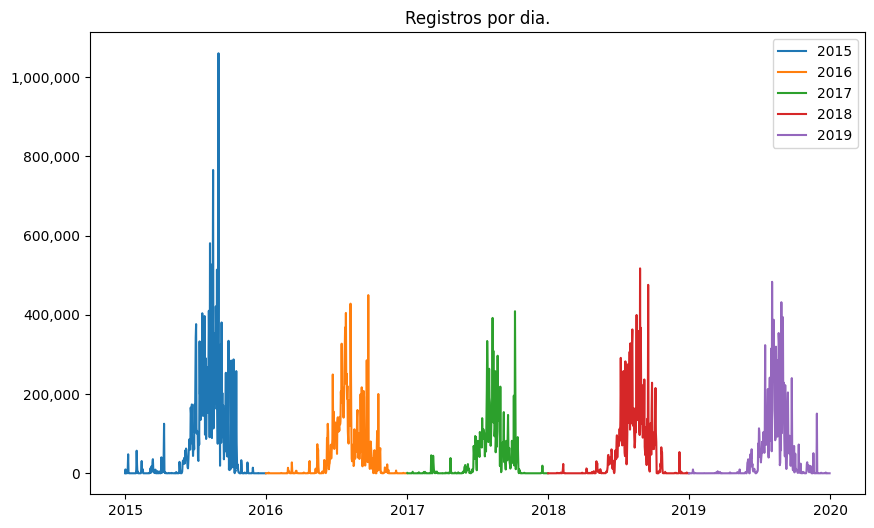

In [9]:
fig = plt.figure(figsize=(10, 6))
for year in vPd['Datetime'].dt.year.unique():
   
    data = vPd[vPd['Datetime'].dt.year == year]
    
    plt.plot(data['Datetime'], data['count'], label=year)
    
plt.title('Registros por dia.')
plt.ticklabel_format(axis='y', style='plain')
# Establece la función de formato para las etiquetas del eje y
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_tick))

plt.legend()

plt.show()

In [10]:
# Define una función para asignar un color a cada año
def assign_color(row):
    year = row.Datetime.year
    if year == 2015:
        return 'blue'
    elif year == 2016:
        return 'orange'
    elif year == 2017:
        return 'green'
    elif year == 2018:
        return 'red'
    else:
        return 'purple'

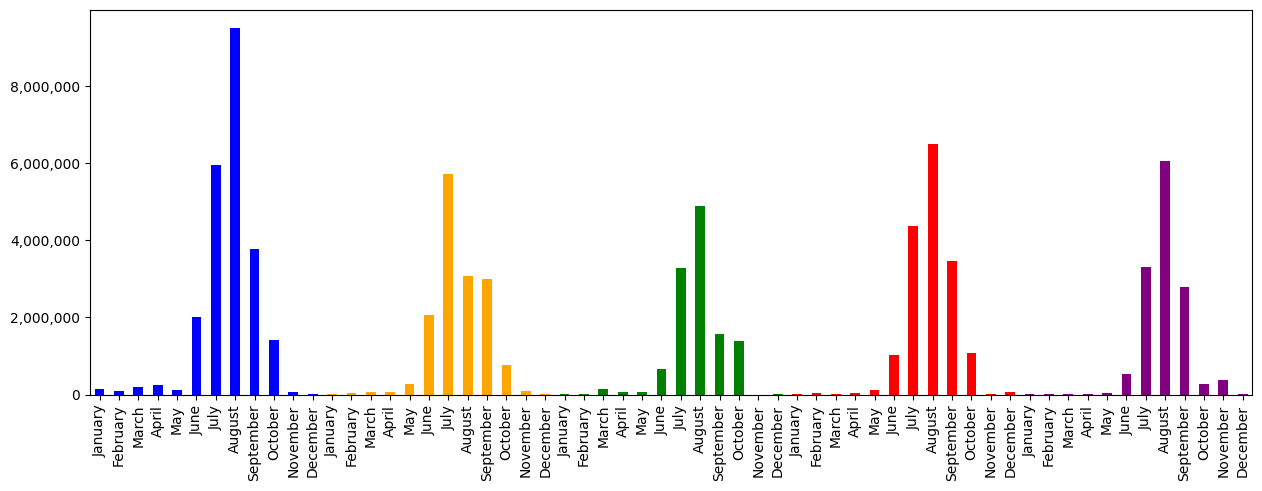

In [11]:
# Aplica la función a cada fila del dataframe para generar una lista de colores
colors = vPm.apply(assign_color, axis=1)

# Genera el histograma
ax = vPm["count"].plot(kind='bar', figsize=(15, 5), color=colors)

# Cambia las etiquetas del eje x
ax.set_xticklabels(vPm["Datetime"].dt.month_name())

# Rota las etiquetas del eje x 45 grados
plt.xticks(rotation=90)


plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_tick))


plt.show()

In [12]:
vPmPrincipal=vPm[(vPm["Datetime"].dt.month>5) & (vPm["Datetime"].dt.month<11)]

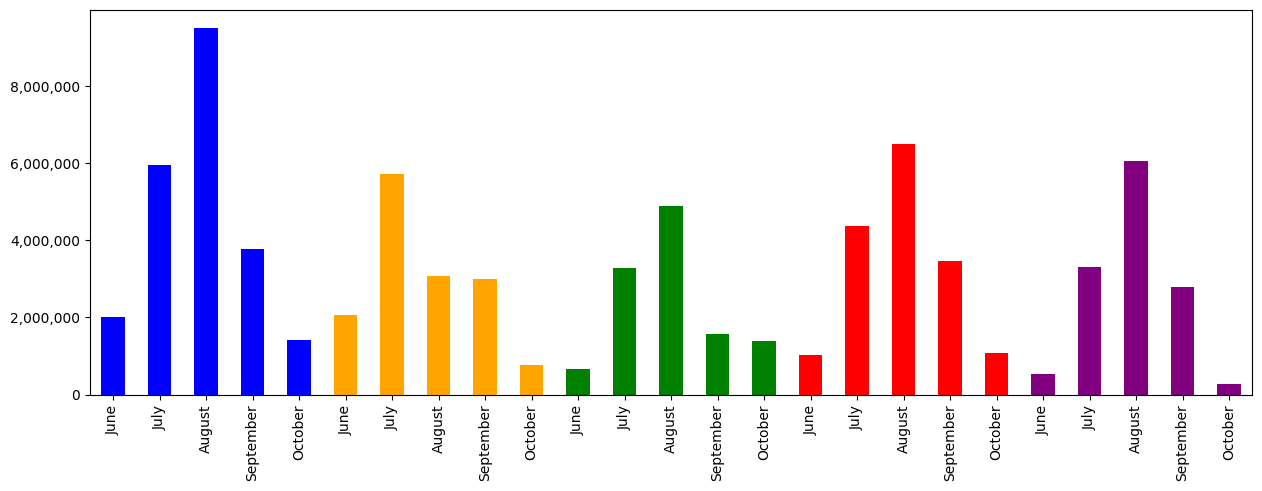

In [13]:
# Aplica la función a cada fila del dataframe para generar una lista de colores
colors = vPmPrincipal.apply(assign_color, axis=1)

# Genera el histograma
ax = vPmPrincipal["count"].plot(kind='bar', figsize=(15, 5), color=colors)

# Cambia las etiquetas del eje x
ax.set_xticklabels(vPmPrincipal["Datetime"].dt.month_name())

# Rota las etiquetas del eje x 45 grados
plt.xticks(rotation=90)


plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_tick))


plt.show()